# <center>Watson Wireless Use Case</center>

<center><font size="3">This is the analysis of the first case from the Data Science Challenges using Python, done by:<br><b>Walid Ismail (wismail@eg.ibm.com)</b></font?</center><br><br>

# 0. Introduction

Write introduction here ...

# 1. Get the Watson Studio project token to use it to access the data file

In [266]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='01cb8ab3-b48d-441d-8d33-edc6caae425d', project_access_token='p-d36f9300425b2c63be8cd6c20d68a07ef91ec977')
pc = project.project_context

In [267]:
# Import main needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 2. Load the data file

In [268]:
pd.set_option('display.width', 3000)
pd.set_option('display.max.columns', 500) # display up to 500 colums without ... use horizontal scrolling instead
pd.set_option('display.max.rows', 50)

# Fetch the Customer file
my_file = project.get_file("telco.csv")

# Read the EXCEl data file from the object storage into a pandas DataFrame
my_file.seek(0)
ww_df = pd.read_csv(my_file)
print("\nNumber of customers: {}".format(len(ww_df)))
ww_df.head()


Number of customers: 1000


,region,tenure,age,marital,address,income,ed,employ,gender,tollfree,equip,callcard,wireless,multline,voice,pager,internet,callid,confer,ebill,custcat,churn
0,2,13,44,1,9,64,4,5,0,0,0,1,0,0,0,0,0,0,0,0,1,1
1,3,11,33,1,7,136,5,5,0,1,0,1,1,0,1,1,0,1,1,0,4,1
2,3,68,52,1,24,116,1,29,1,1,0,1,0,0,0,0,0,1,1,0,3,0
3,2,33,33,0,12,33,2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
4,2,23,30,1,9,30,1,2,0,0,0,0,0,0,0,0,0,1,1,0,3,0


# 3. Exploratory Data Analysis

In [269]:
ww_df.shape # dimensions of data set

(1000, 22)

In [270]:
ww_df.isnull().sum() # check if any cells have missing values

region      0
tenure      0
age         0
marital     0
address     0
income      0
ed          0
employ      0
gender      0
tollfree    0
equip       0
callcard    0
wireless    0
multline    0
voice       0
pager       0
internet    0
callid      0
confer      0
ebill       0
custcat     0
churn       0
dtype: int64

In [271]:
ww_df.info() # check data type of each field

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
region      1000 non-null int64
tenure      1000 non-null int64
age         1000 non-null int64
marital     1000 non-null int64
address     1000 non-null int64
income      1000 non-null int64
ed          1000 non-null int64
employ      1000 non-null int64
gender      1000 non-null int64
tollfree    1000 non-null int64
equip       1000 non-null int64
callcard    1000 non-null int64
wireless    1000 non-null int64
multline    1000 non-null int64
voice       1000 non-null int64
pager       1000 non-null int64
internet    1000 non-null int64
callid      1000 non-null int64
confer      1000 non-null int64
ebill       1000 non-null int64
custcat     1000 non-null int64
churn       1000 non-null int64
dtypes: int64(22)
memory usage: 172.0 KB


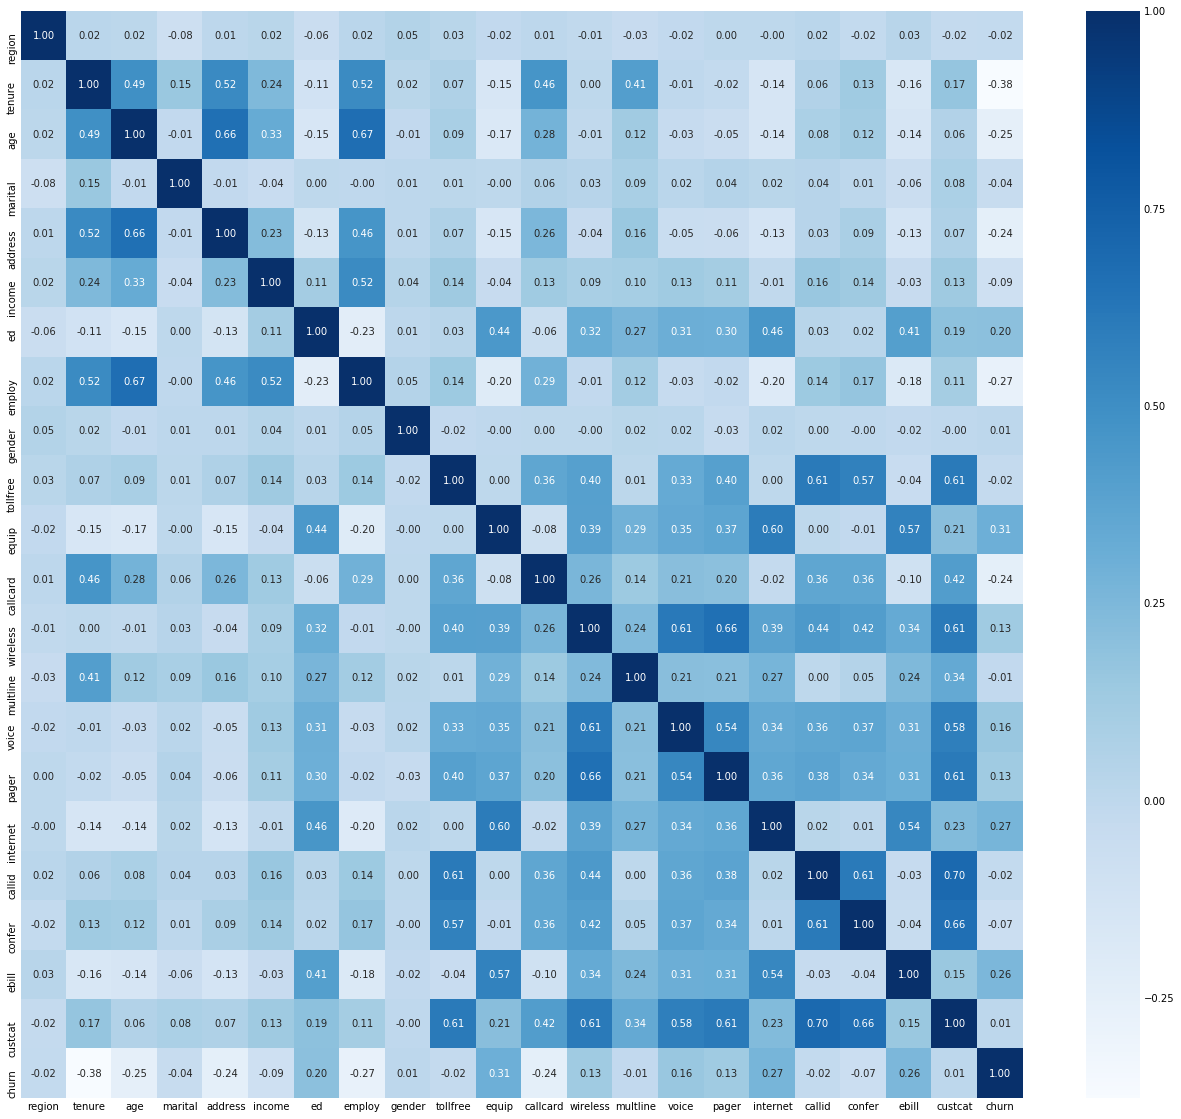

In [272]:
# view correlations between variables as a heat map, useful mainly for numeric variables (not binary variables)
plt.figure(figsize=(20, 20))
sns.heatmap(ww_df.corr(), cmap="Blues", annot=True, fmt=".2f") 

In [273]:
ww_df.describe() # view statisical measures of variables

,region,tenure,age,marital,address,income,ed,employ,gender,tollfree,equip,callcard,wireless,multline,voice,pager,internet,callid,confer,ebill,custcat,churn
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.517000,0.474000,0.386000,0.678000,0.296000,0.475000,0.304000,0.2610,0.368000,0.481000,0.502000,0.371000,2.487000,0.274000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.499961,0.499573,0.487074,0.467477,0.456719,0.499624,0.460213,0.4394,0.482503,0.499889,0.500246,0.483314,1.120306,0.446232
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


# 4. Feature Engineering / Data Preparation

From data inscpection we can observe the following about the variables / features / target:
<ul>
    <li>We have 22 attribuites in our dataset (21 possible features and one target)</li>
    <li>All attributes are in numeric format.</li>
    <li>We have <b>four</b> numeric variables that are continious in nature <b>(age, income, employ, tenure)</b>. These variables will require scaling before they are used in modeling</li>
    <li><b>Three</b> numeric variables <b>region, address, ed</b> that are numeric encoding of categorical variables so they only need scaling.</li>
    <li><b>Fourteen</b> variables <b>(marital, gender, tollfree, equip, callcard, wireless, multline, voice, pager, internet, callid, confer, ebill, custcat)</b> that are categroical in nature and are already encoded as <b>0,1</b> so there is no need for any further conversions or preprocessing on these variables</li>
    <li>Our target variable <b>churn</b> is also encoded as <b>0,1</b> so it is already prepared for modeling</li>
</ul>

# 5. Feature Selection

## 5.1 Cross Tabulation

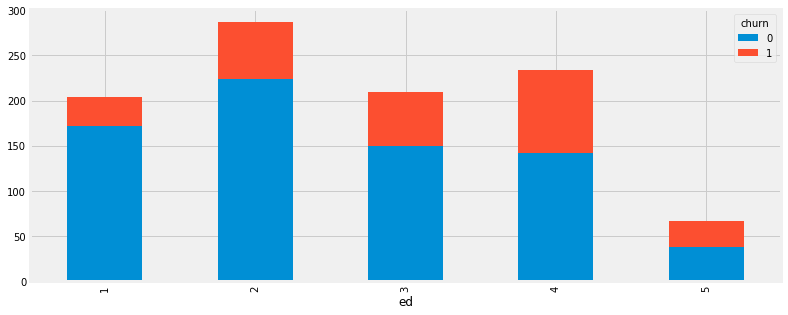

In [274]:
bins = pd.cut(ww_df['age'], bins=5)
#tab = pd.crosstab(bins, ww_df.churn,margins=True)
tab = pd.crosstab(ww_df.ed, ww_df.churn,margins=True)
tab = tab.drop('All',axis=1)
tab = tab.drop('All',axis=0)
tab.plot(kind='bar', stacked = True, figsize=(12,5))
plt.show()

## 5.2 Correlations

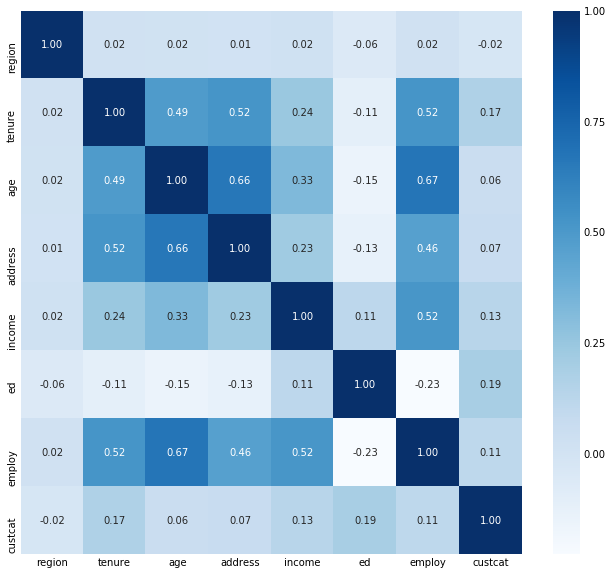

In [275]:
#check for correlations between numeric features. Rule, if two features that are highly correlated one should be dropped
numeric_features = ['region', 'tenure', 'age', 'address', 'income', 'ed', 'employ', 'custcat']
#ww_df[numeric_features].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(ww_df[numeric_features].corr(), cmap="Blues", annot=True, fmt=".2f") 

## 5.3 SelectKBest Method

In [276]:
# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
pd.set_option('display.expand_frame_repr', False)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# load data

features = ['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'gender', 
            'tollfree', 'equip', 'callcard', 'wireless', 'multline', 'voice', 'pager', 'internet', 'callid', 'confer', 'ebill', 'custcat']

target = 'churn'

X = ww_df[features]
Y = ww_df[target]
# feature extraction
test = SelectKBest(score_func=chi2, k=5)
fit = test.fit(X, Y)
# summarize scores
np.set_printoptions(precision=3, suppress=True)
print(fit.scores_)
features = fit.transform(X)

# get the array of observations for top 5 features, NICE!!
print(features)

[    0.09   1821.803   241.608     0.756   519.892  1231.706    23.25
   694.966     0.018     0.252    57.137    19.113    12.286     0.105
    17.686    12.511    46.22      0.24      2.119    41.506     0.026]
[[ 13  44   9  64   5]
 [ 11  33   7 136   5]
 [ 68  52  24 116  29]
 ..., 
 [ 67  59  40 944  33]
 [ 70  49  18  87  22]
 [ 50  36   7  39   3]]


# 6. Modeling

## 6.1 Feature Scaling

In [277]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

#features = ['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'gender', 
#            'tollfree', 'equip', 'callcard', 'wireless', 'multline', 'voice', 'pager', 'internet', 'callid', 'confer', 'ebill', 'custcat']
features = ['tenure', 'income', 'employ', 'equip', 'ed']
target = 'churn'

# ALWAYS SPLIT FIRST BEFORE SCALING TO AVOID PREDICTOR LEAKAGE !!!!!
X = ww_df[features]
y = ww_df[target]

#Train Test Split, reserve test subset for finally accuracy and other metrics calculations
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

scaler = MinMaxScaler(feature_range = (0, 1))
scaler.fit(X_train) # fit the scaler on training data then apply to training and test data
X_train = scaler.transform(X_train)
X_test =  scaler.transform(X_test)
print('Done')

Done


## 6.2 Modeling (using different models)

In [278]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

# using specific random state to make sure we always get same accuracy result if we execute this cell multiple times or on multiple machines

logreg = LogisticRegression(random_state=1)
# 10-fold cross-validation, calculating average training accuracy
scores = cross_val_score(logreg, X_train, y_train, cv=5, scoring='accuracy')
print("Logistic regression accuracy is:", scores.mean())

svc = svm.SVC(random_state=1)
# 10-fold cross-validation, calculating average training accuracy
scores = cross_val_score(svc, X_train, y_train, cv=5, scoring='accuracy')
print("SVM accuracy is: ", scores.mean())

rc = RandomForestClassifier(random_state=1)
# 10-fold cross-validation, calculating average training accuracy
scores = cross_val_score(rc, X_train, y_train, cv=5, scoring='accuracy')
print("Random forest accuracy is: ", scores.mean())

Logistic regression accuracy is: 0.78
SVM accuracy is:  0.761428571429
Random forest accuracy is:  0.742857142857


## 6.3 Fine tuning the selected model hyperparameters

In [279]:
from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import RandomizedSearchCV
import numpy as np

C_options = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
solver_options = ['newton-cg', 'lbfgs', 'liblinear', 'sag']
class_weight_options = [None, 'balanced']
param_grid = dict(C = C_options, solver = solver_options, class_weight = class_weight_options)

clf = GridSearchCV(LogisticRegression(), param_grid)

#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)] # Number of trees in random forest
#max_features = ['auto', 'sqrt'] # Number of features to consider at every split
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)] # Maximum number of levels in tree
#max_depth.append(None)
#min_samples_split = [2, 5, 10] # Minimum number of samples required to split a node
#min_samples_leaf = [1, 2, 4] # Minimum number of samples required at each leaf node
#bootstrap = [True, False] # Method of selecting samples for training each tree

# Create the random grid
#param_grid = {'n_estimators': n_estimators,
#               'max_features': max_features,
#               'max_depth': max_depth,
#               'min_samples_split': min_samples_split,
#               'min_samples_leaf': min_samples_leaf,
#               'bootstrap': bootstrap}

#clf = RandomizedSearchCV(RandomForestClassifier(random_state = 1), param_grid, random_state=1)
clf.fit(X_train, y_train)
best_model = clf.best_estimator_
best_model

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

# 7. Model Evaluation

## 7.1 Testing accuracy

In [280]:
y_pred = best_model.predict(X_test)

from sklearn.metrics import classification_report

print('\nAccuracy of tuned model on test set: {}\n'.format(best_model.score(X_test, y_test)))

print(classification_report(y_test, y_pred))


Accuracy of tuned model on test set: 0.77

             precision    recall  f1-score   support

          0       0.79      0.91      0.85       211
          1       0.68      0.43      0.52        89

avg / total       0.76      0.77      0.75       300



## 7.2 Displaying the modeling predictors sorted by coefficent

In [281]:
import pandas as pd

# model is the trained model
importances = best_model.coef_[0]
print(importances)

# Extract the feature importances into a dataframe
feature_results = pd.DataFrame({'feature': features, 
                                'importance': importances})

# Show the top 10 most important
feature_results = feature_results.sort_values('importance', ascending = False).reset_index(drop=True)

feature_results.head(10)


[-2.893  1.571 -1.033  1.038  0.833]


,feature,importance
0,income,1.571211
1,equip,1.038013
2,ed,0.832831
3,employ,-1.033063
4,tenure,-2.892869


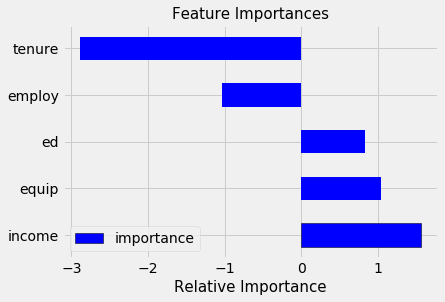

In [282]:
plt.figure(figsize=(12, 6))
plt.style.use('fivethirtyeight')

# Plot the most important features in a horizontal bar chart
feature_results.plot(x = 'feature', y = 'importance', 
                                 edgecolor = 'k',
                                 kind='barh', color = 'blue')
plt.xlabel('Relative Importance', size = 15)
plt.ylabel('')
plt.title('Feature Importances', size = 15)
plt.show()


## 7.3 Confsuion Matrix

In [283]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.grid(False)


    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 38  51]
 [ 18 193]]


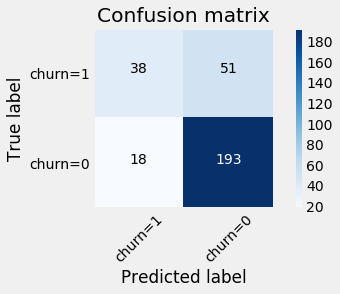

In [284]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],  title='Confusion matrix')


# 8. Conclusions

Summarize everything here...